# Converting ATN netCDF file to Dawrin Core

The IOOS notebook
[environment](https://github.com/ioos/notebooks_demos/blob/229dabe0e7dd207814b9cfb96e024d3138f19abf/environment.yml#L73-L76)
installs the `R` language and the `Jupyter` kernel needed to run `R` notebooks.
Conda can also install extra `R` packages,
and those packages that are unavailable in `conda` can be installed directly from CRAN with `install.packages(pkg_name)`. This notebook uses the library `r-tidync` which can be installed via conda as shown below:

```
conda install r-tidync
```

You can start `jupyter` from any other environment and change the kernel later using the drop-down menu.
(Check the `R` logo at the top right to ensure you are in the `R` jupyter kernel.)

In this simple example we will use two libraries aimed at the oceanography community written in `R`: tidync, RNetCDF, and netcdf4

R blog on tidync: [https://ropensci.org/blog/2019/11/05/tidync/](https://ropensci.org/blog/2019/11/05/tidync/)

In [1]:
library(tidync)

**Caution** This notebook uses a local file for testing purposes.

In [2]:
url = 'https://github.com/ioos/ioos-atn-data/raw/master/data/examples/atn_trajectory_template.nc'
download.file(url, 'atn_trajectory_template.nc', mode = "wb")

In [3]:
atn <- tidync("atn_trajectory_template.nc")
atn


Data Source (1): atn_trajectory_template.nc ...

Grids (3) <dimension family> : <associated variables> 

[1]   D0 : time, z, lat, lon, location_class, deploy_id, instrument, type, error_radius, semi_major_axis, semi_minor_axis, ellipse_orientation, offset, offset_orientation, comment, qartod_rollup_flag, qartod_speed_flag, qartod_location_flag, qartod_time_flag    **ACTIVE GRID** ( 2216  values per variable)
[2]   D1 : taxon_name, taxon_lsid
[3]   S  : trajectory, crs, instrument_location, instrument_tag, platform

Dimensions 2 (1 active): 
  
  dim   name  length   min   max start count  dmin  dmax unlim coord_dim 
  <chr> <chr>  <dbl> <dbl> <dbl> <int> <int> <dbl> <dbl> <lgl> <lgl>     
1 D0    obs     2216     1  2216     1  2216     1  2216 FALSE FALSE     
  
Inactive dimensions:
  
  dim   name   length   min   max unlim coord_dim 
  <chr> <chr>   <dbl> <dbl> <dbl> <lgl> <lgl>     
1 D1    nchars     41     1    41 FALSE FALSE     

Collect all the metadata from the netCDF file.

In [4]:
ncmeta::nc_atts("atn_trajectory_template.nc")

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,cf_role,trajectory,trajectory_id
1,long_name,trajectory,trajectory identifier
0,_FillValue,time,-9999.9
1,units,time,seconds since 1990-01-01 00:00:00Z
2,standard_name,time,time
3,axis,time,T
4,_CoordinateAxisType,time,Time
5,calendar,time,standard
6,long_name,time,Time


Collect all the data from the netCDF file as a tibble.

In [5]:
atn_tbl <- atn %>% hyper_tibble()

[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute _FillValue is an 8-byte value, but R"
[1] "does not support this data type. I am return

In [6]:
atn_tbl

time,z,lat,lon,location_class,deploy_id,instrument,type,error_radius,semi_major_axis,semi_minor_axis,ellipse_orientation,offset,offset_orientation,comment,qartod_rollup_flag,qartod_speed_flag,qartod_location_flag,qartod_time_flag,obs
<dbl>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
949244734,0,41.3899,-70.0309,B,195533,UT,Argos,NA,NA,NA,NA,NA,NA,nan,0,0,0,0,1
949245216,0,41.3972,-70.0302,1,195533,UT,Argos,607,987,373,107,NA,NA,nan,0,0,0,0,2
949246286,0,41.3940,-70.0313,0,195533,UT,Argos,1689,2521,1131,71,NA,NA,nan,0,0,0,0,3
949247537,0,41.3995,-69.9917,A,195533,UT,Argos,398,1340,118,82,NA,NA,nan,0,0,0,0,4
949267374,0,41.3416,-69.8560,0,195533,UT,Argos,1555,4412,547,86,NA,NA,nan,0,0,0,0,5
949270917,0,41.3103,-69.8707,B,195533,UT,Argos,2818,26005,305,109,NA,NA,nan,0,0,0,0,6
949270917,0,41.3082,-69.8755,B,195533,UT,Argos,2650,30080,233,112,NA,NA,nan,0,0,0,0,7
949274174,0,41.2992,-69.8729,B,195533,UT,Argos,4062,7885,2092,104,NA,NA,nan,0,0,0,0,8
949276943,0,41.2904,-69.8699,B,195533,UT,Argos,1626,2543,1039,98,NA,NA,nan,0,0,0,0,9


Notice the data in the **time** column aren't formatted as times. We need to read the metadata associated with the time variable to understand what the units are. Below, we print a tibble of all the attributes from the **time** variable.

Notice the _units_ attribute and it's value of `seconds since 1990-01-01 00:00:00Z`. We need to use that information to convert the time variable to something useful that `ggplot` can handle.

In [7]:
ncmeta::nc_atts("atn_trajectory_template.nc" , "time")

id,name,variable,value
<int>,<chr>,<chr>,<named list>
0,_FillValue,time,-9999.9
1,units,time,seconds since 1990-01-01 00:00:00Z
2,standard_name,time,time
3,axis,time,T
4,_CoordinateAxisType,time,Time
5,calendar,time,standard
6,long_name,time,Time
7,actual_min,time,2020-01-30T15:05:34Z
8,actual_max,time,2020-06-15T23:16:37Z


So, we grab the value from the `units` attribute, split the string to collect the date information, and apply that to a time conversion function `as.POSIXct`.

In [9]:
library(stringr)
# grab origin date from time variable units attribute
tunit <- ncmeta::nc_atts("atn_trajectory_template.nc" , "time") %>% dplyr::filter(name == "units")
lunit <- str_split(tunit$value,' ')[[1]]
atn_tbl$time <- as.POSIXct(atn_tbl$time, origin=lunit[3], tz="GMT")
atn_tbl

time,z,lat,lon,location_class,deploy_id,instrument,type,error_radius,semi_major_axis,semi_minor_axis,ellipse_orientation,offset,offset_orientation,comment,qartod_rollup_flag,qartod_speed_flag,qartod_location_flag,qartod_time_flag,obs
<dttm>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2020-01-30 15:05:34,0,41.3899,-70.0309,B,195533,UT,Argos,NA,NA,NA,NA,NA,NA,nan,0,0,0,0,1
2020-01-30 15:13:36,0,41.3972,-70.0302,1,195533,UT,Argos,607,987,373,107,NA,NA,nan,0,0,0,0,2
2020-01-30 15:31:26,0,41.3940,-70.0313,0,195533,UT,Argos,1689,2521,1131,71,NA,NA,nan,0,0,0,0,3
2020-01-30 15:52:17,0,41.3995,-69.9917,A,195533,UT,Argos,398,1340,118,82,NA,NA,nan,0,0,0,0,4
2020-01-30 21:22:54,0,41.3416,-69.8560,0,195533,UT,Argos,1555,4412,547,86,NA,NA,nan,0,0,0,0,5
2020-01-30 22:21:57,0,41.3103,-69.8707,B,195533,UT,Argos,2818,26005,305,109,NA,NA,nan,0,0,0,0,6
2020-01-30 22:21:57,0,41.3082,-69.8755,B,195533,UT,Argos,2650,30080,233,112,NA,NA,nan,0,0,0,0,7
2020-01-30 23:16:14,0,41.2992,-69.8729,B,195533,UT,Argos,4062,7885,2092,104,NA,NA,nan,0,0,0,0,8
2020-01-31 00:02:23,0,41.2904,-69.8699,B,195533,UT,Argos,1626,2543,1039,98,NA,NA,nan,0,0,0,0,9


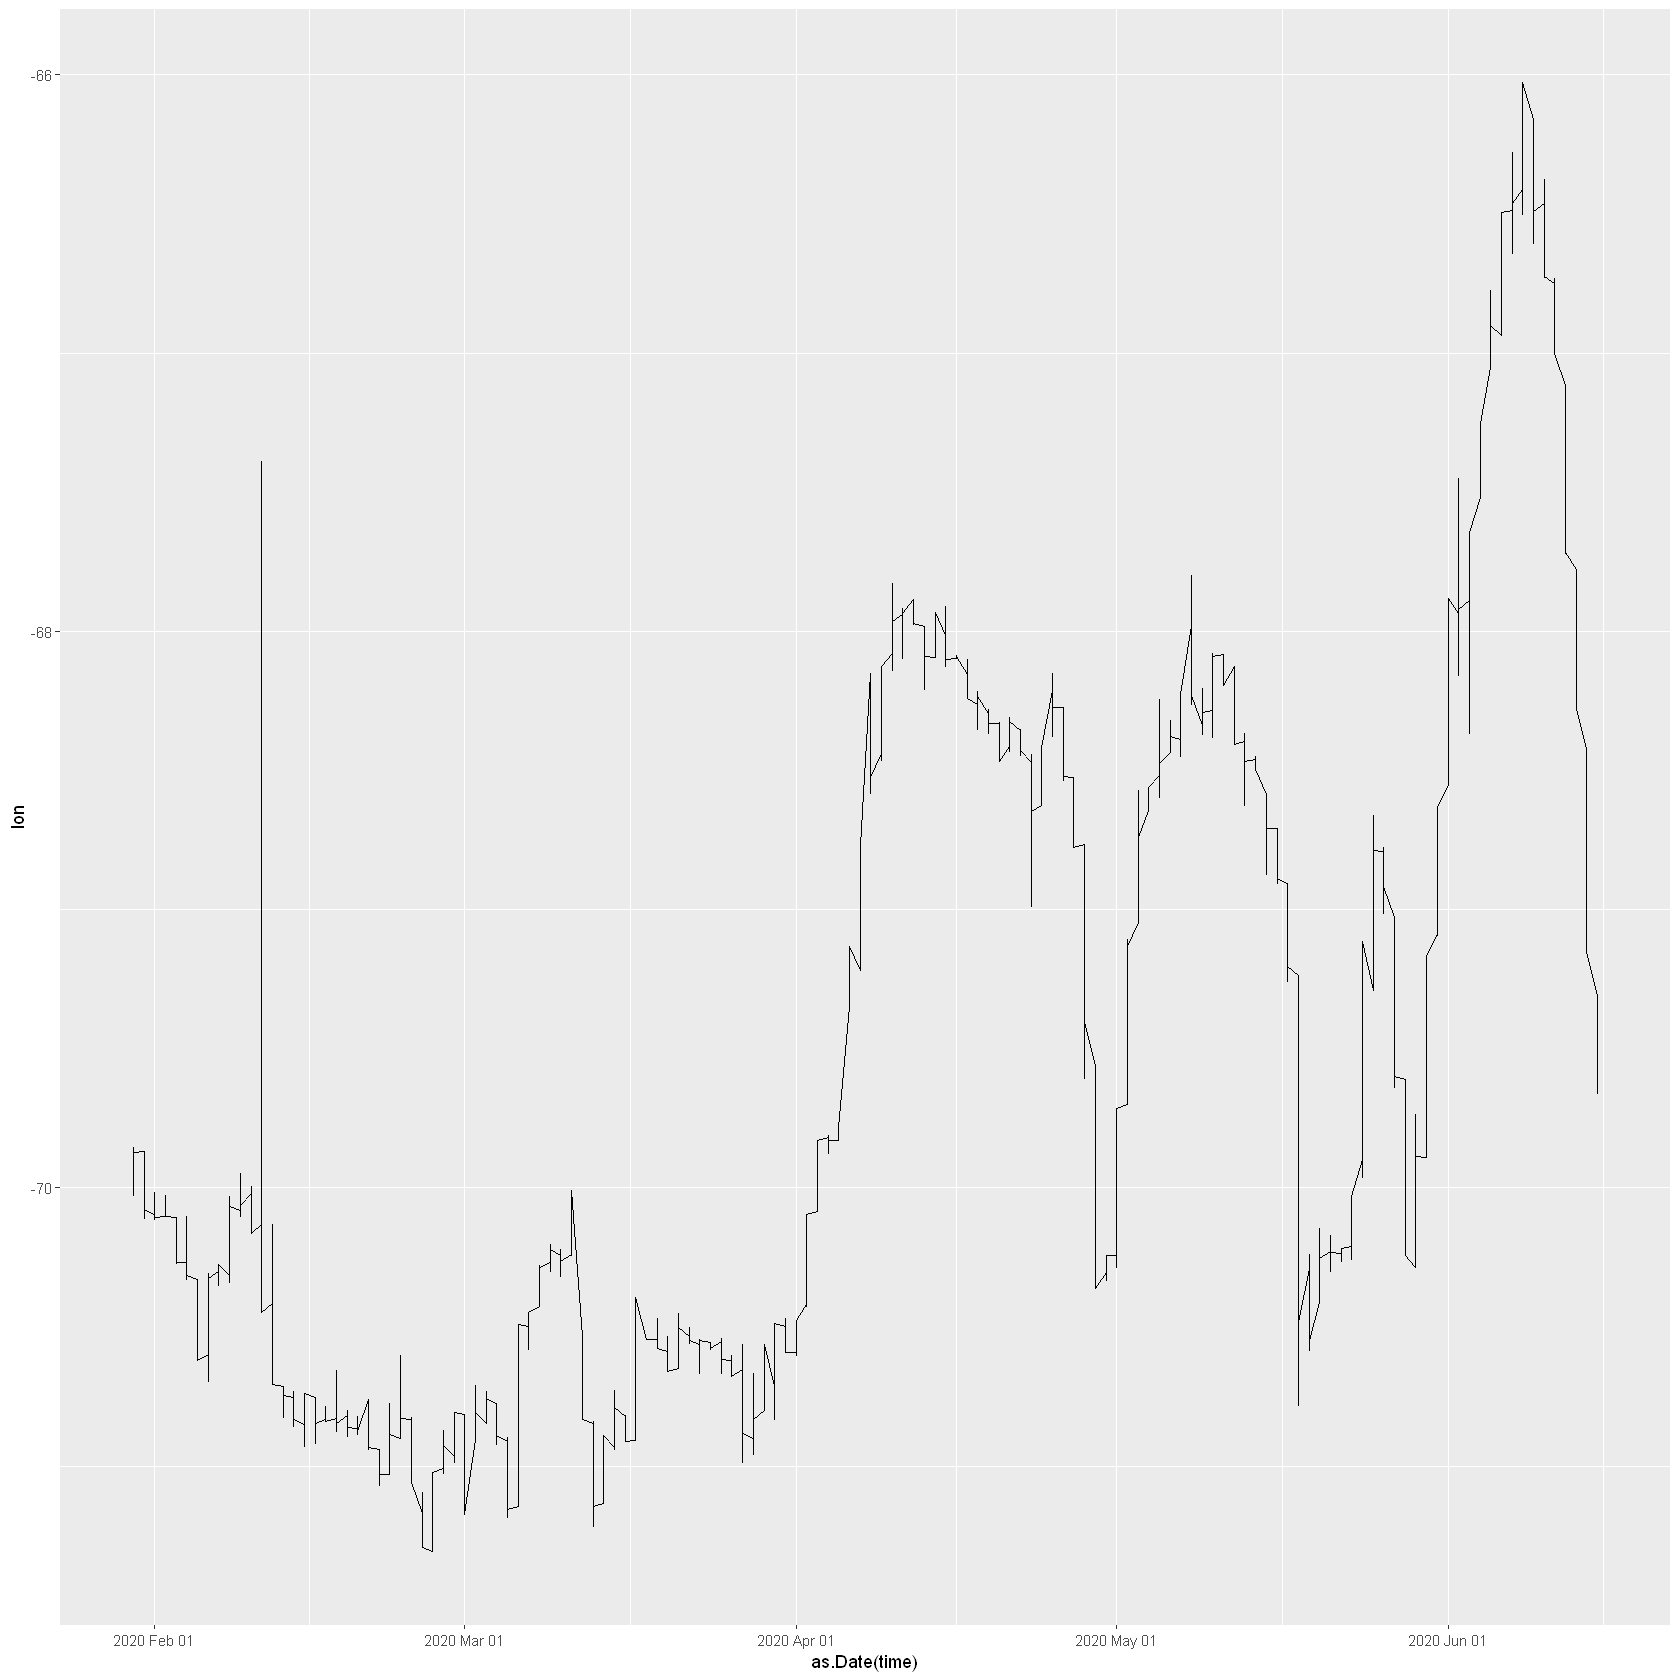

In [10]:
library(ggplot2)
options(repr.plot.width = 14, repr.plot.height = 14)

# grab origin date from time variable units attribute
#tunit <- ncmeta::nc_atts("atn_trajectory_template.nc" , "time") %>% dplyr::filter(name == "units")
#lunit <- str_split(tunit$value,' ')[[1]]

ggplot(atn_tbl, aes(x=as.Date(time), y=lon)) + 
geom_line() + 
scale_x_date(date_labels = "%Y %b %d")

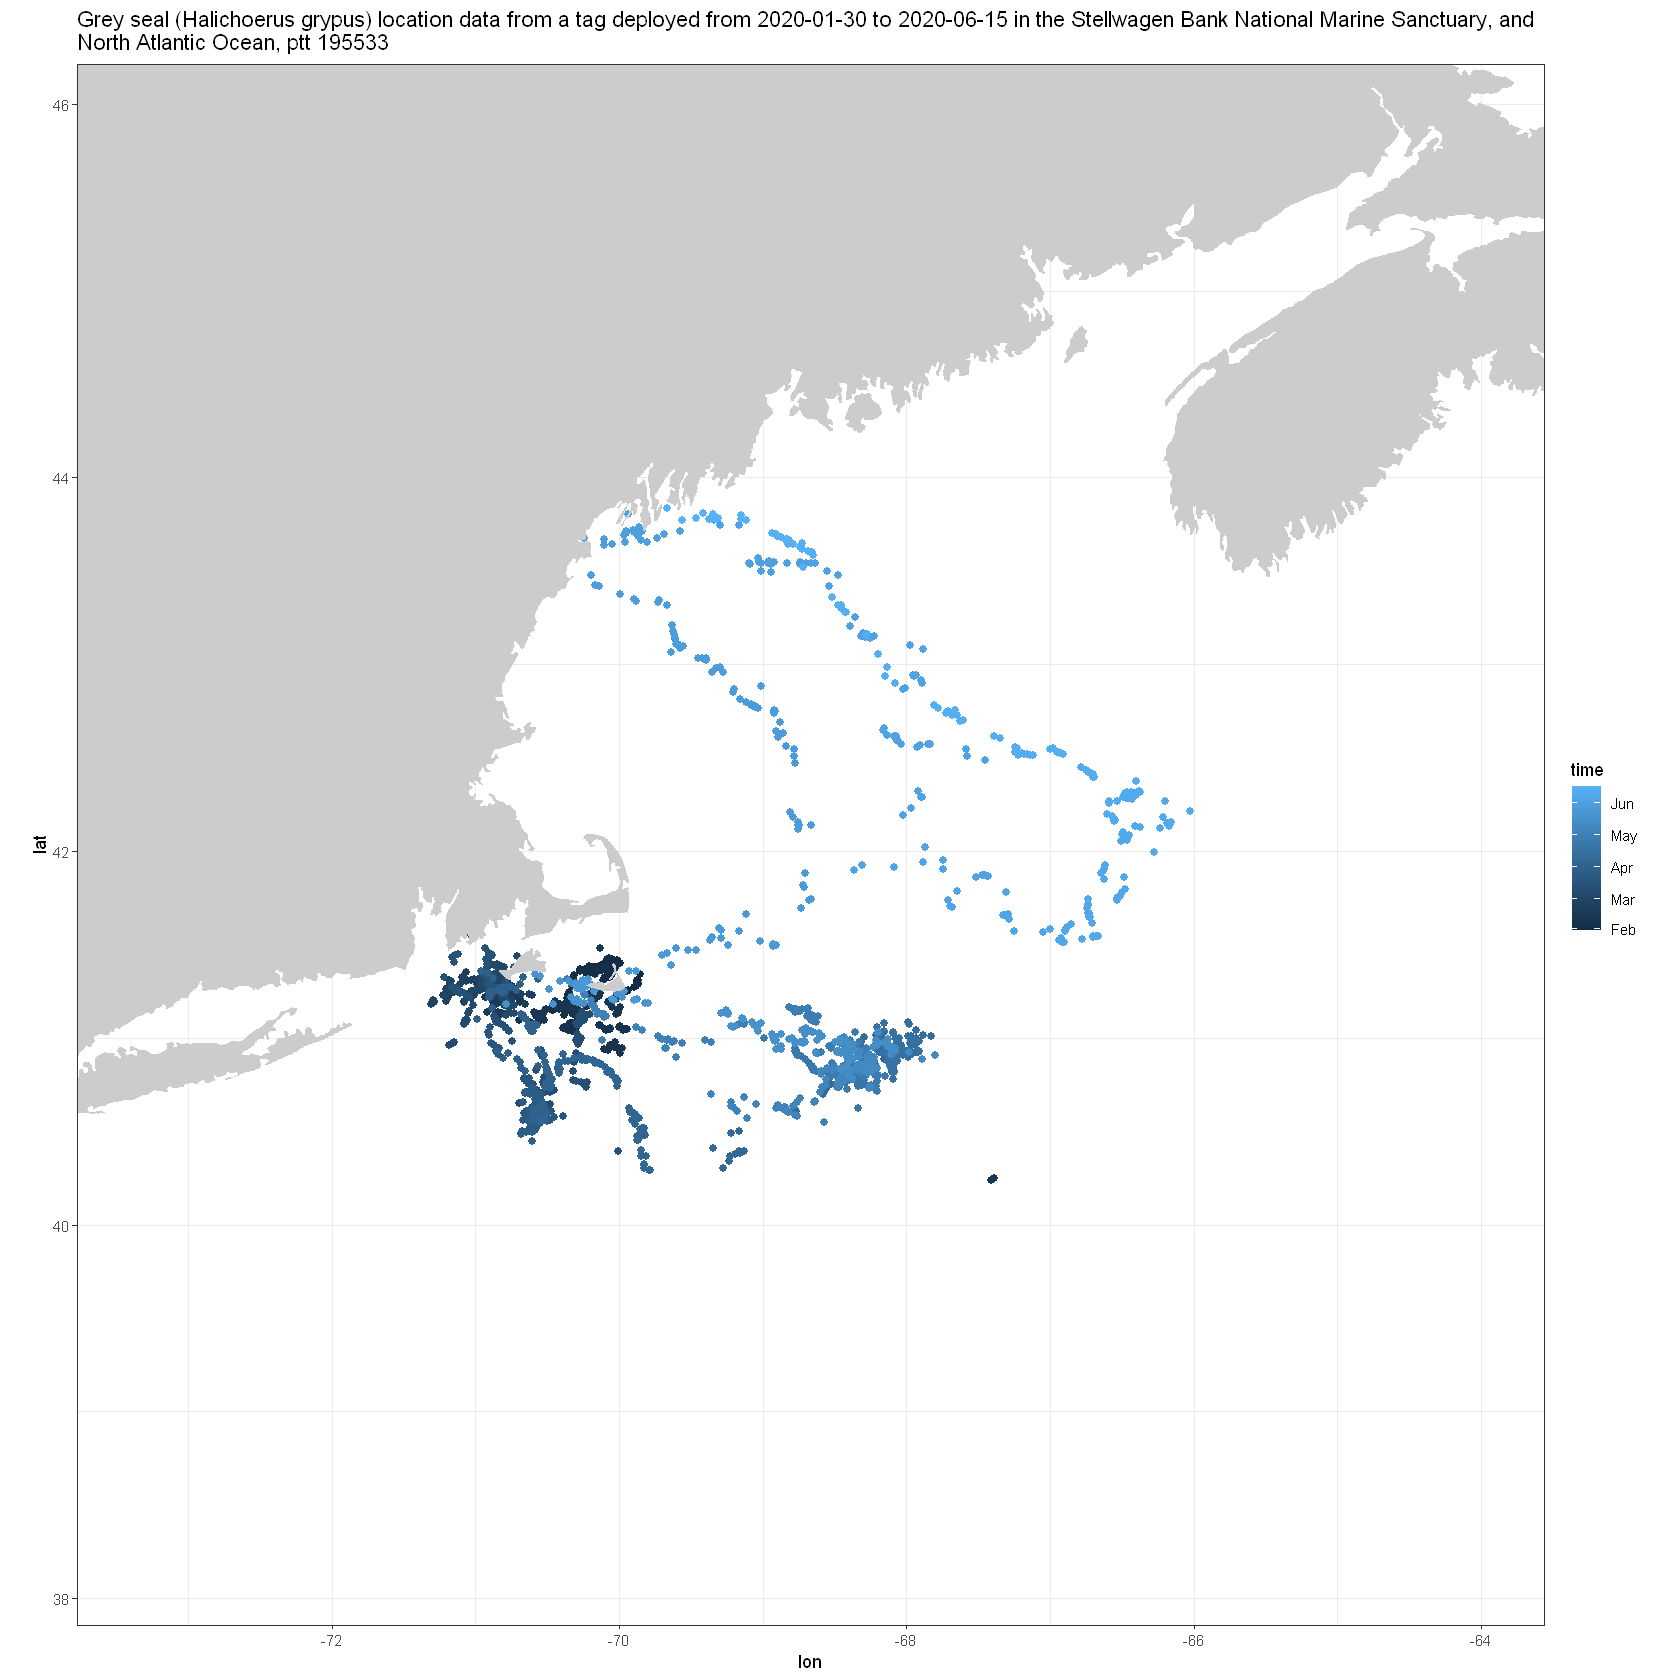

In [25]:
library('maps')
library('mapdata')

# collect title
title <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "title")


# Map limits.
ylim <- c( min(atn_tbl$lat)-2, max(atn_tbl$lat)+2 )
xlim <- c( min(atn_tbl$lon)-2, max(atn_tbl$lon)+2 )

# Get outline data for map.
w <- map_data( 'worldHires', ylim = ylim, xlim = xlim )

z <- ggplot(atn_tbl, aes( x = lon, y = lat )) +
     geom_point( aes(colour = time), size = 2.0) +
     scale_shape_manual( values = c(19, 1) )

z + geom_polygon(data = w, aes(x = long, y = lat, group = group), fill = 'grey80') + 
    theme_bw() +
    coord_fixed(1.3, xlim = xlim, ylim = ylim) + 
    ggtitle( paste( strwrap(title$value, width = 150), collapse = "\n") )

In [18]:
min(atn_tbl$time)
max(atn_tbl$time)

[1] "2020-01-30 15:05:34 GMT"

[1] "2020-06-15 23:16:37 GMT"

Now let's work through converting this netCDF file to Darwin Core. Following the guidance published at https://github.com/tdwg/dwc-for-biologging/wiki/Data-guidelines.

Could also use this as a resource: https://github.com/ocean-tracking-network/biologging_standardization/tree/master/examples/braun-blueshark/darwincore-example

In [60]:
# for Event Core following: 
# https://github.com/tdwg/dwc-for-biologging/wiki/Data-guidelines#event-core

eventdf <- data.frame( atn_tbl$time, atn_tbl$lat, atn_tbl$lon, atn_tbl$z)

# eventID
# urn:catalog:[datacenter]:[institution]:[project shortcode]:[datacenter-specific-ID] 
# At OTN, the datacenter-specific ID is a combination of the animal's identifier, project affiliation, 
# and the date of release. e.g. urn:catalog:otn:DAL:NSBS:NSBS-Hops:20170722053000-release
#
# institution <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "institution")
# project_shortcode <- 'atn'
# datacenter_specific_ID <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "tag_id")
#
# id <- paste("urn:catalog:atn",institution$value,project_shortcode,datacenter_specific_ID$value, sep = ":")

uuid_tbl = ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "uuid")
eventdf$eventID <- uuid_tbl$value

#eventDate
eventdf$eventDate <- eventdf$atn_tbl.time
eventdf$atn_tbl.time <- NULL

#decimalLatitude
eventdf$decimalLatitude <- eventdf$atn_tbl.lat
eventdf$atn_tbl.lat <- NULL

#decimalLongitude
eventdf$decimalLongitude <- eventdf$atn_tbl.lon
eventdf$atn_tbl.lon <- NULL

#geodeticDatum
gd_tbl <- ncmeta::nc_atts("atn_trajectory_template.nc","crs") %>% dplyr::filter(name == "epsg_code")
eventdf$geodeticDatum <- gd_tbl$value

#maximumDepth and minimumDepth
eventdf$minimumDepthInMeters <- eventdf$atn_tbl.z
eventdf$maximumDepthInMeters <- eventdf$atn_tbl.z
eventdf$atn_tbl.z <- NULL

#locationID
eventdf$locationID <- 'Release' # from https://github.com/tdwg/dwc-for-biologging/wiki/Acoustic-sensor-enabled-tracking-of-blue-sharks

#footprintWKT
ftprnt_tbl = ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "geospatial_bounds")
eventdf$footprintWKT <- ftprnt_tbl$value

#modified
mdfied_tbl <- ncmeta::nc_atts("atn_trajectory_template.nc","NC_GLOBAL") %>% dplyr::filter(name == "date_modified")
eventdf$modified <- mdfied_tbl$value

eventdf

eventID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,minimumDepthInMeters,maximumDepthInMeters,locationID,footprintWKT,modified
<named list>,<dttm>,<dbl>,<dbl>,<named list>,<int>,<int>,<chr>,<named list>,<named list>
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 15:05:34,41.3899,-70.0309,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 15:13:36,41.3972,-70.0302,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 15:31:26,41.3940,-70.0313,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 15:52:17,41.3995,-69.9917,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 21:22:54,41.3416,-69.8560,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 22:21:57,41.3103,-69.8707,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 22:21:57,41.3082,-69.8755,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-30 23:16:14,41.2992,-69.8729,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T00:04:17Z
d11bd637-8d37-4a71-986a-b00330d7f770,2020-01-31 00:02:23,41.2904,-69.8699,EPSG:4326,0,0,Release,"POLYGON ((-67.4121 40.2363, -69.7911 40.2904, -70.6035 40.4449, -70.67910000000001 40.487, -71.1855 40.9593, -71.3079 41.1806, -70.28530000000001 43.6964, -69.9359 43.8012, -69.6621 43.8355, -69.1524 43.7982, -68.7291 43.647, -66.02809999999999 42.2129, -67.39109999999999 40.2468, -67.4121 40.2363))",2020-08-25T0

In [61]:
#uuid_tbl$value

[1] "urn:catalog:atn:NOAA Northeast Fisheries Science Center:atn:195533"

In [ ]:
occurrencedf <- atn_tbl

In [ ]:
mofdf <- atn_tbl